In [1]:
#Import the ne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
#create the credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
heart_db = 'heartdisease'

#create the engine
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, heart_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

#dispose of the engine
engine.dispose()

In [3]:
#pulling the code from the lesson again
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

#standardize the new X set
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [4]:
def dbscan(epsilon, samples):
    dbs = DBSCAN(eps = epsilon, min_samples = samples)
    cluster = dbs.fit_predict(X_trans)
    pca = PCA(n_components=2).fit_transform(X_trans)
    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
                 color=colours[y[i]], fontdict={'weight': 'bold', 'size': 50})
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

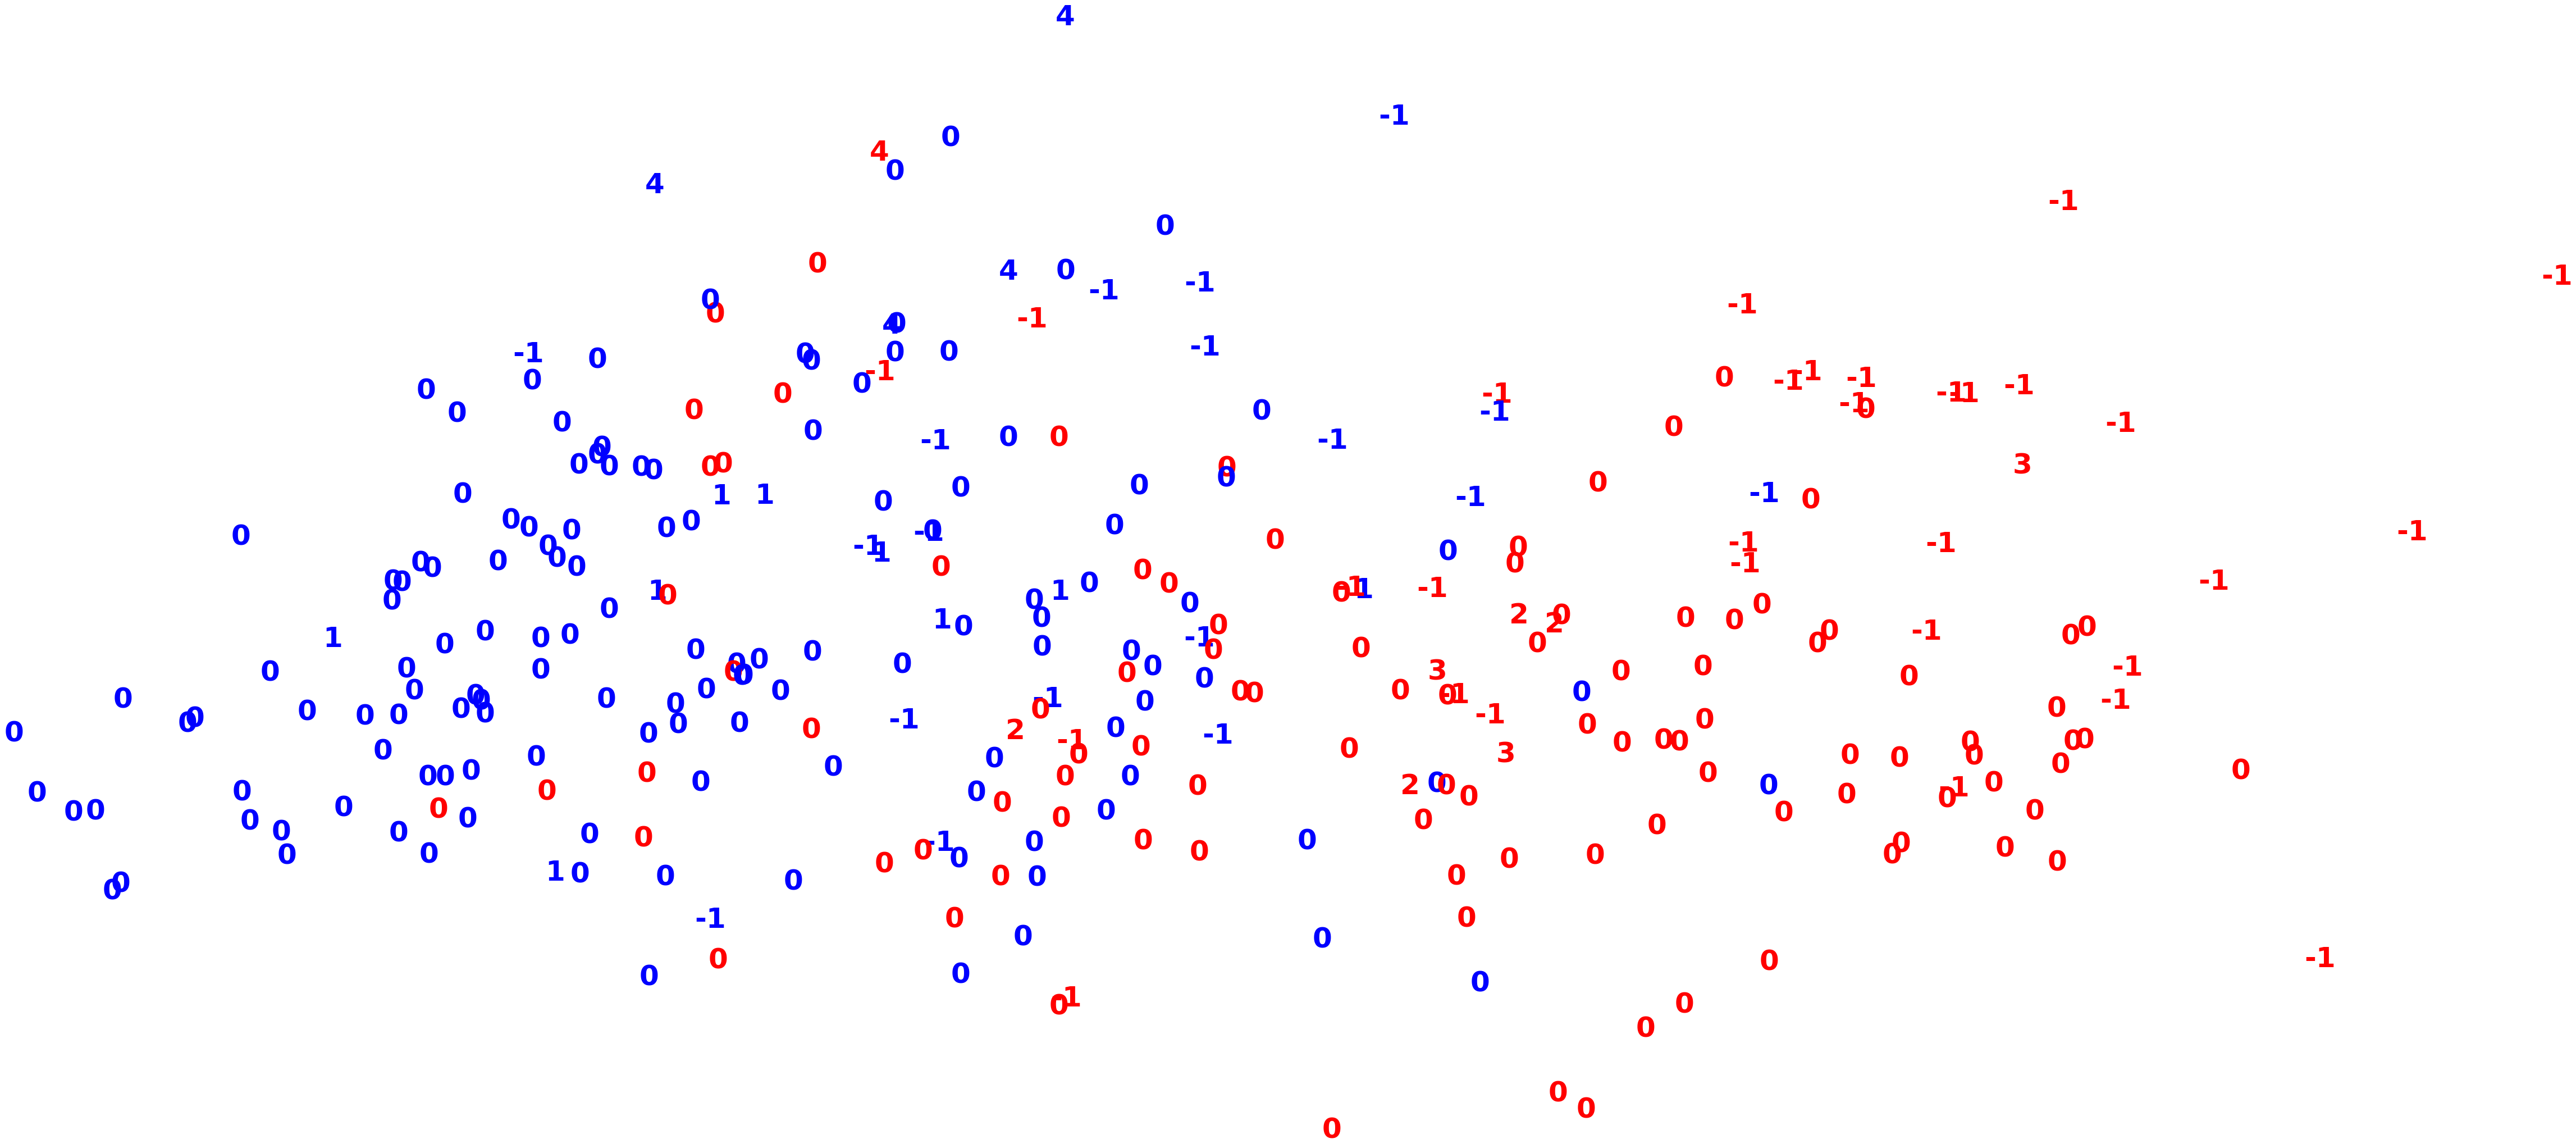

In [10]:
dbscan(3, 5)

In [11]:
def dbse(epsilon, samples):
    dbs = DBSCAN(eps = epsilon, min_samples = samples, metric='euclidean')
    cluster = dbs.fit_predict(X_trans)
    pca = PCA(n_components=2).fit_transform(X_trans)
    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
                 color=colours[y[i]], fontdict={'weight': 'bold', 'size': 50})
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

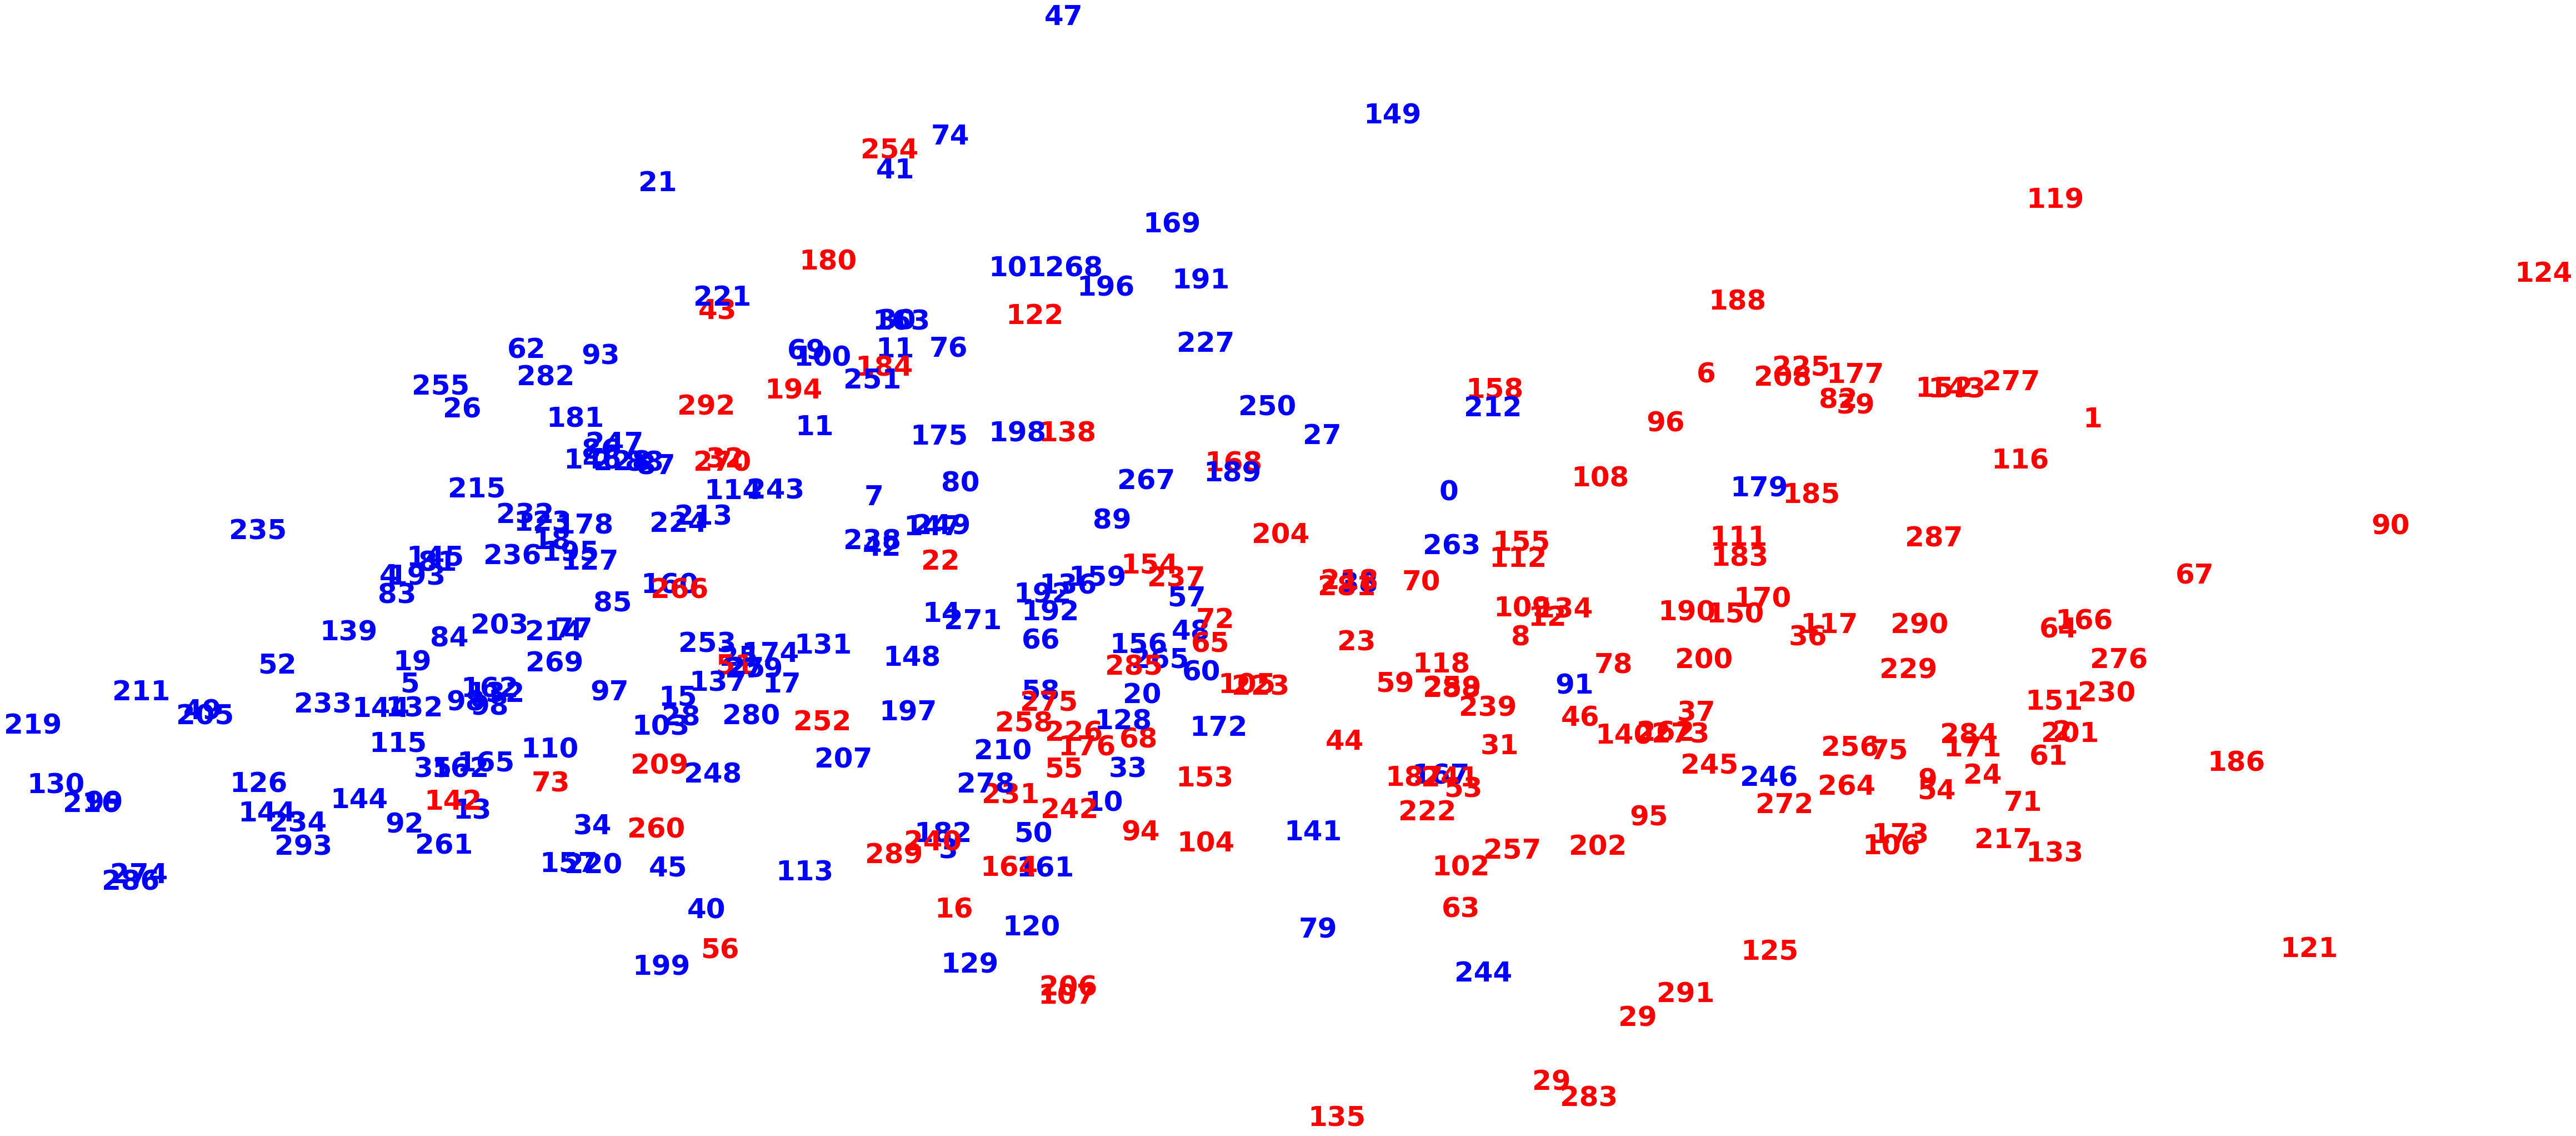

In [12]:
dbse(1, 1)

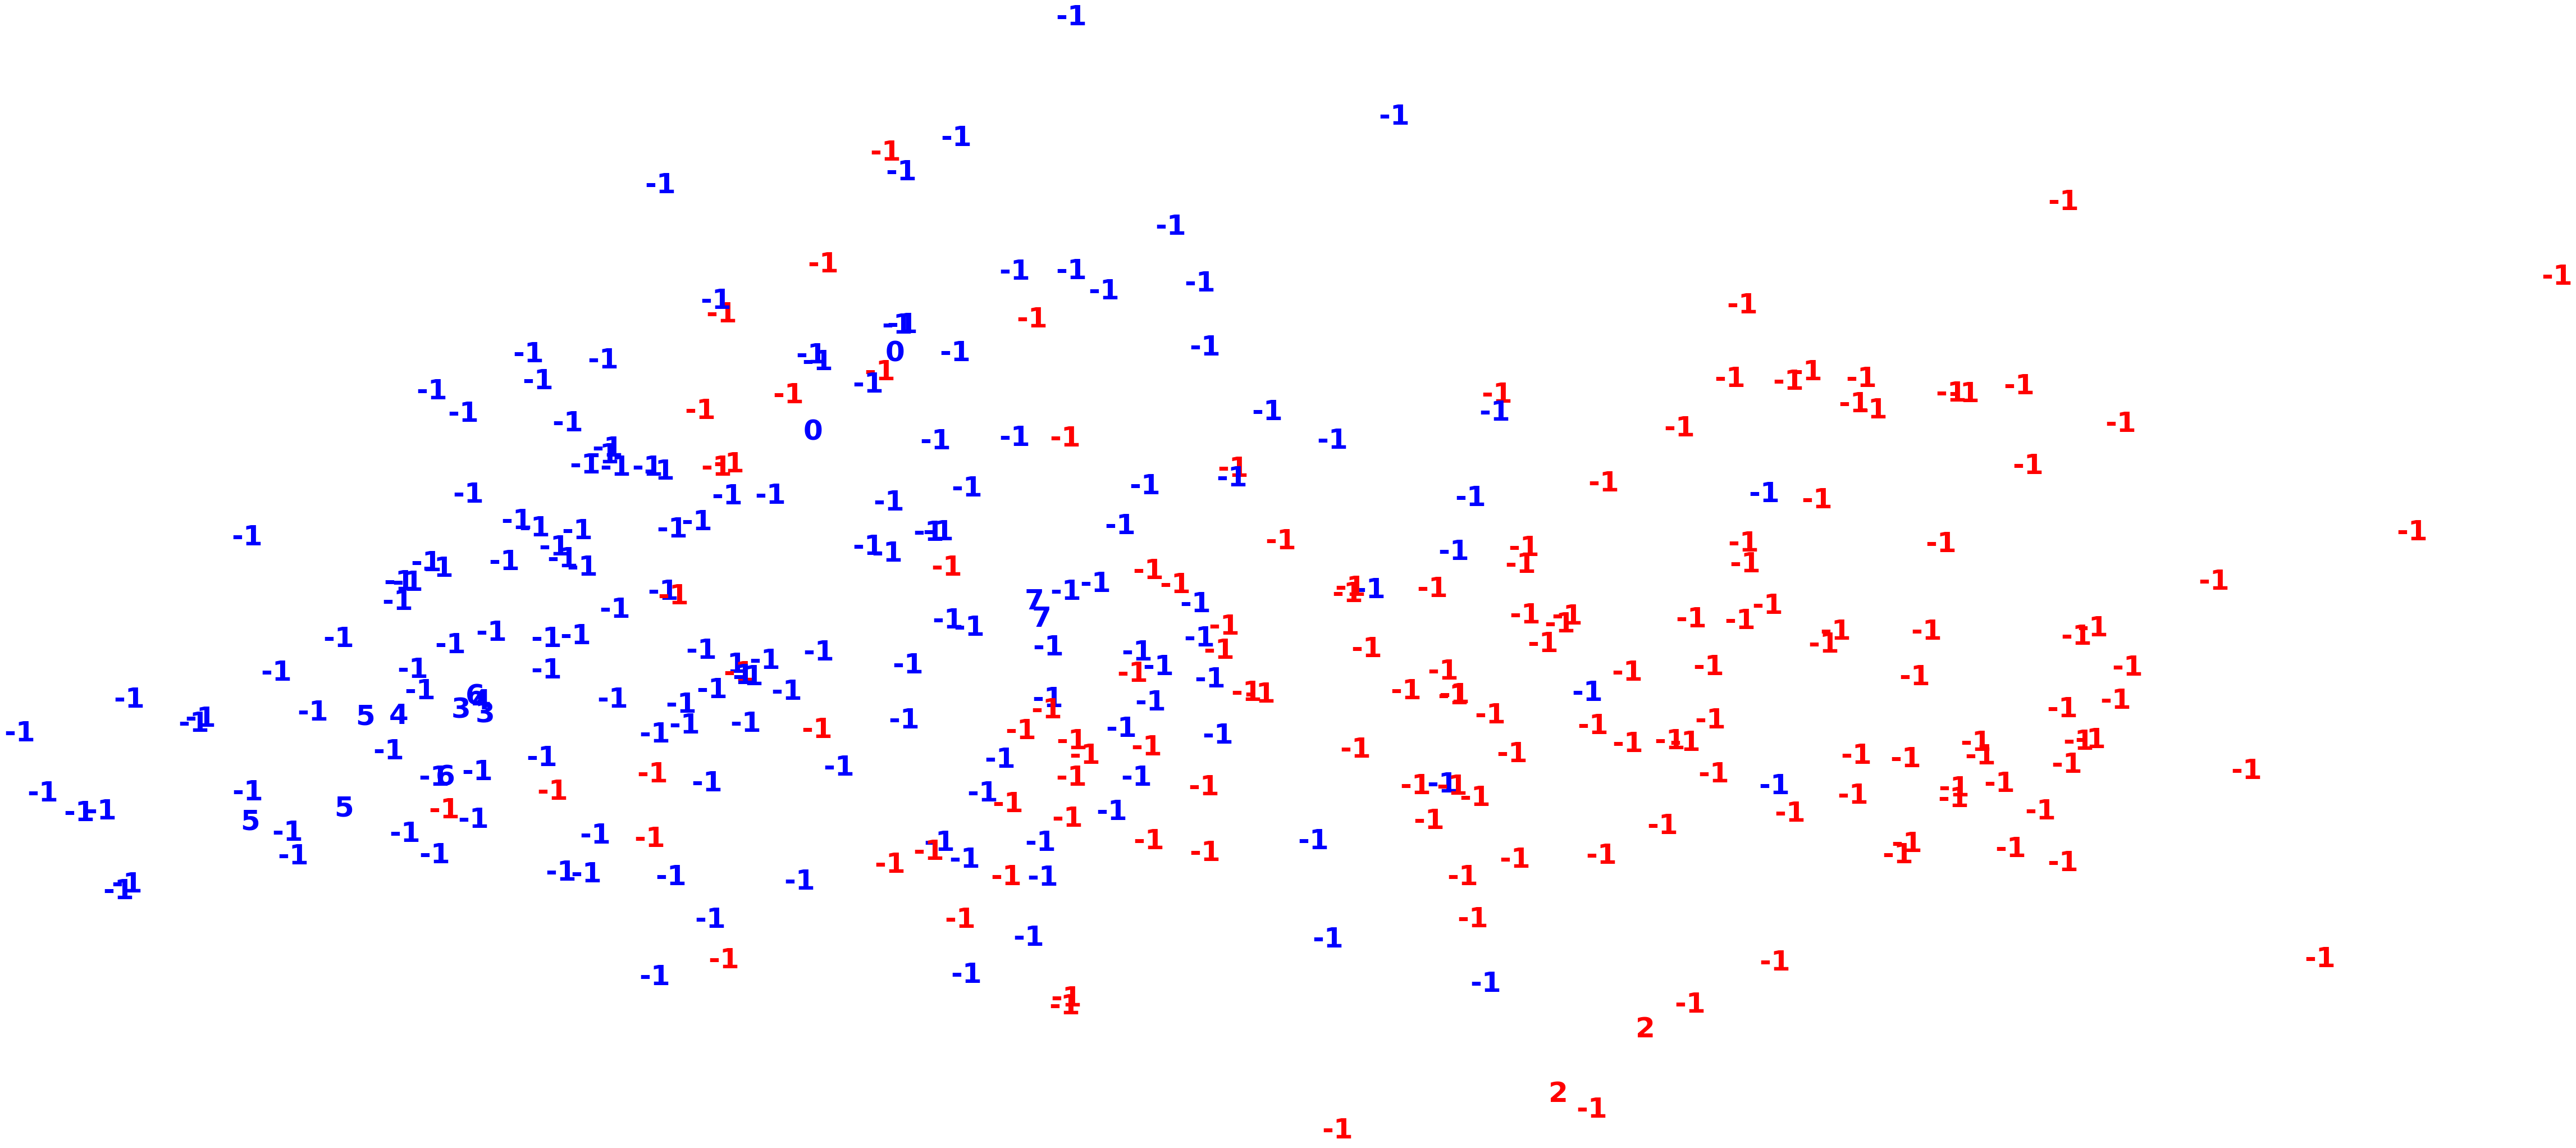

In [13]:
dbse(1, 2)

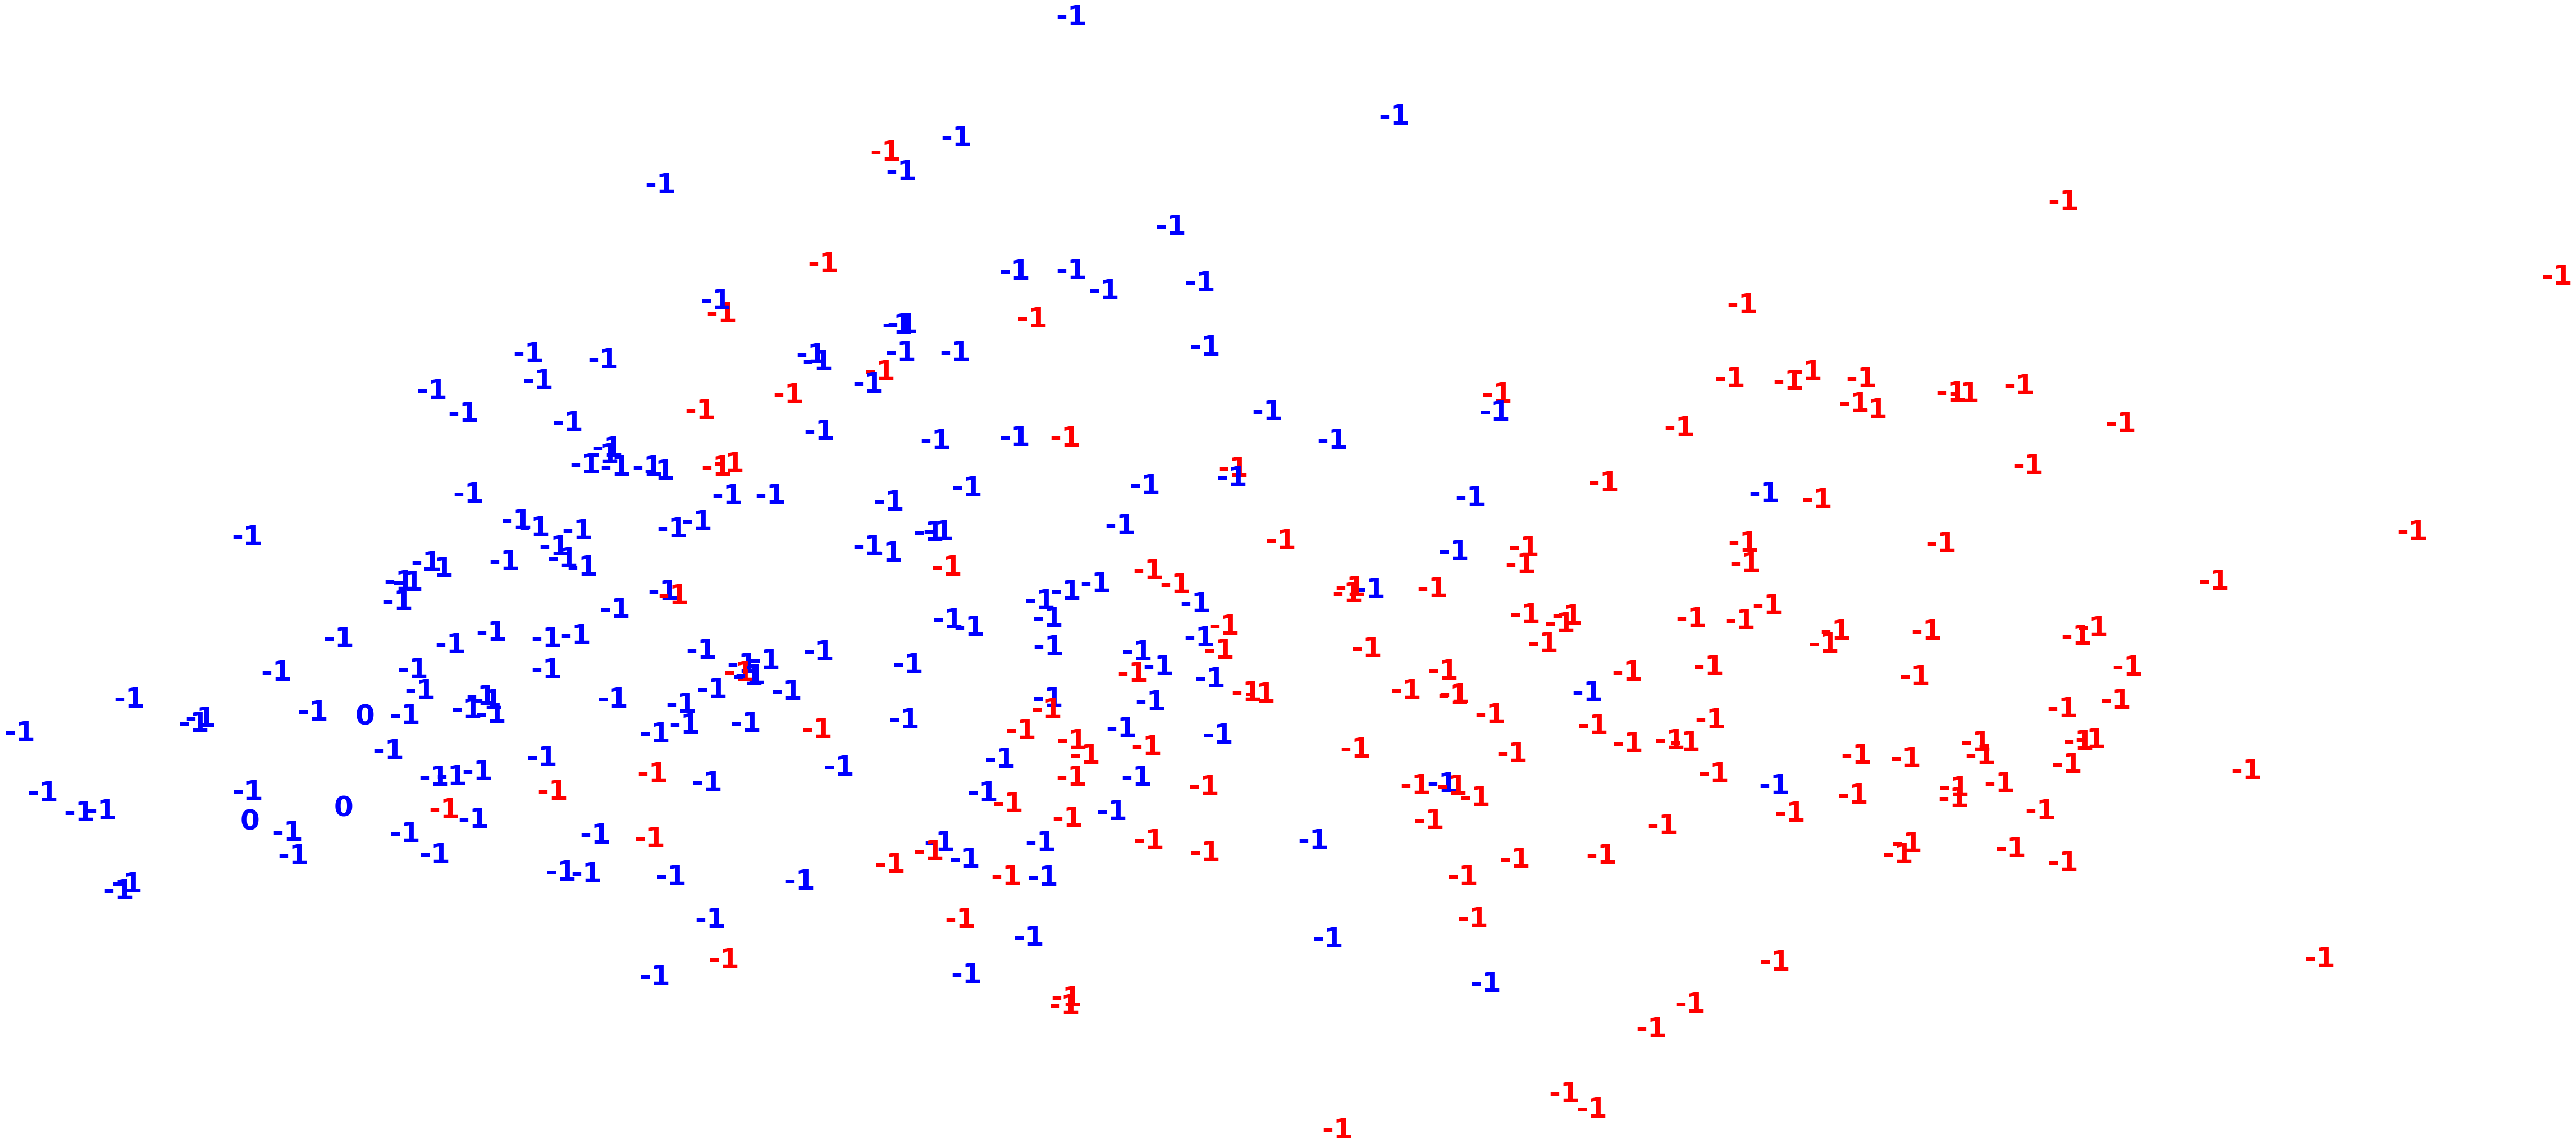

In [14]:
dbse(1, 3)

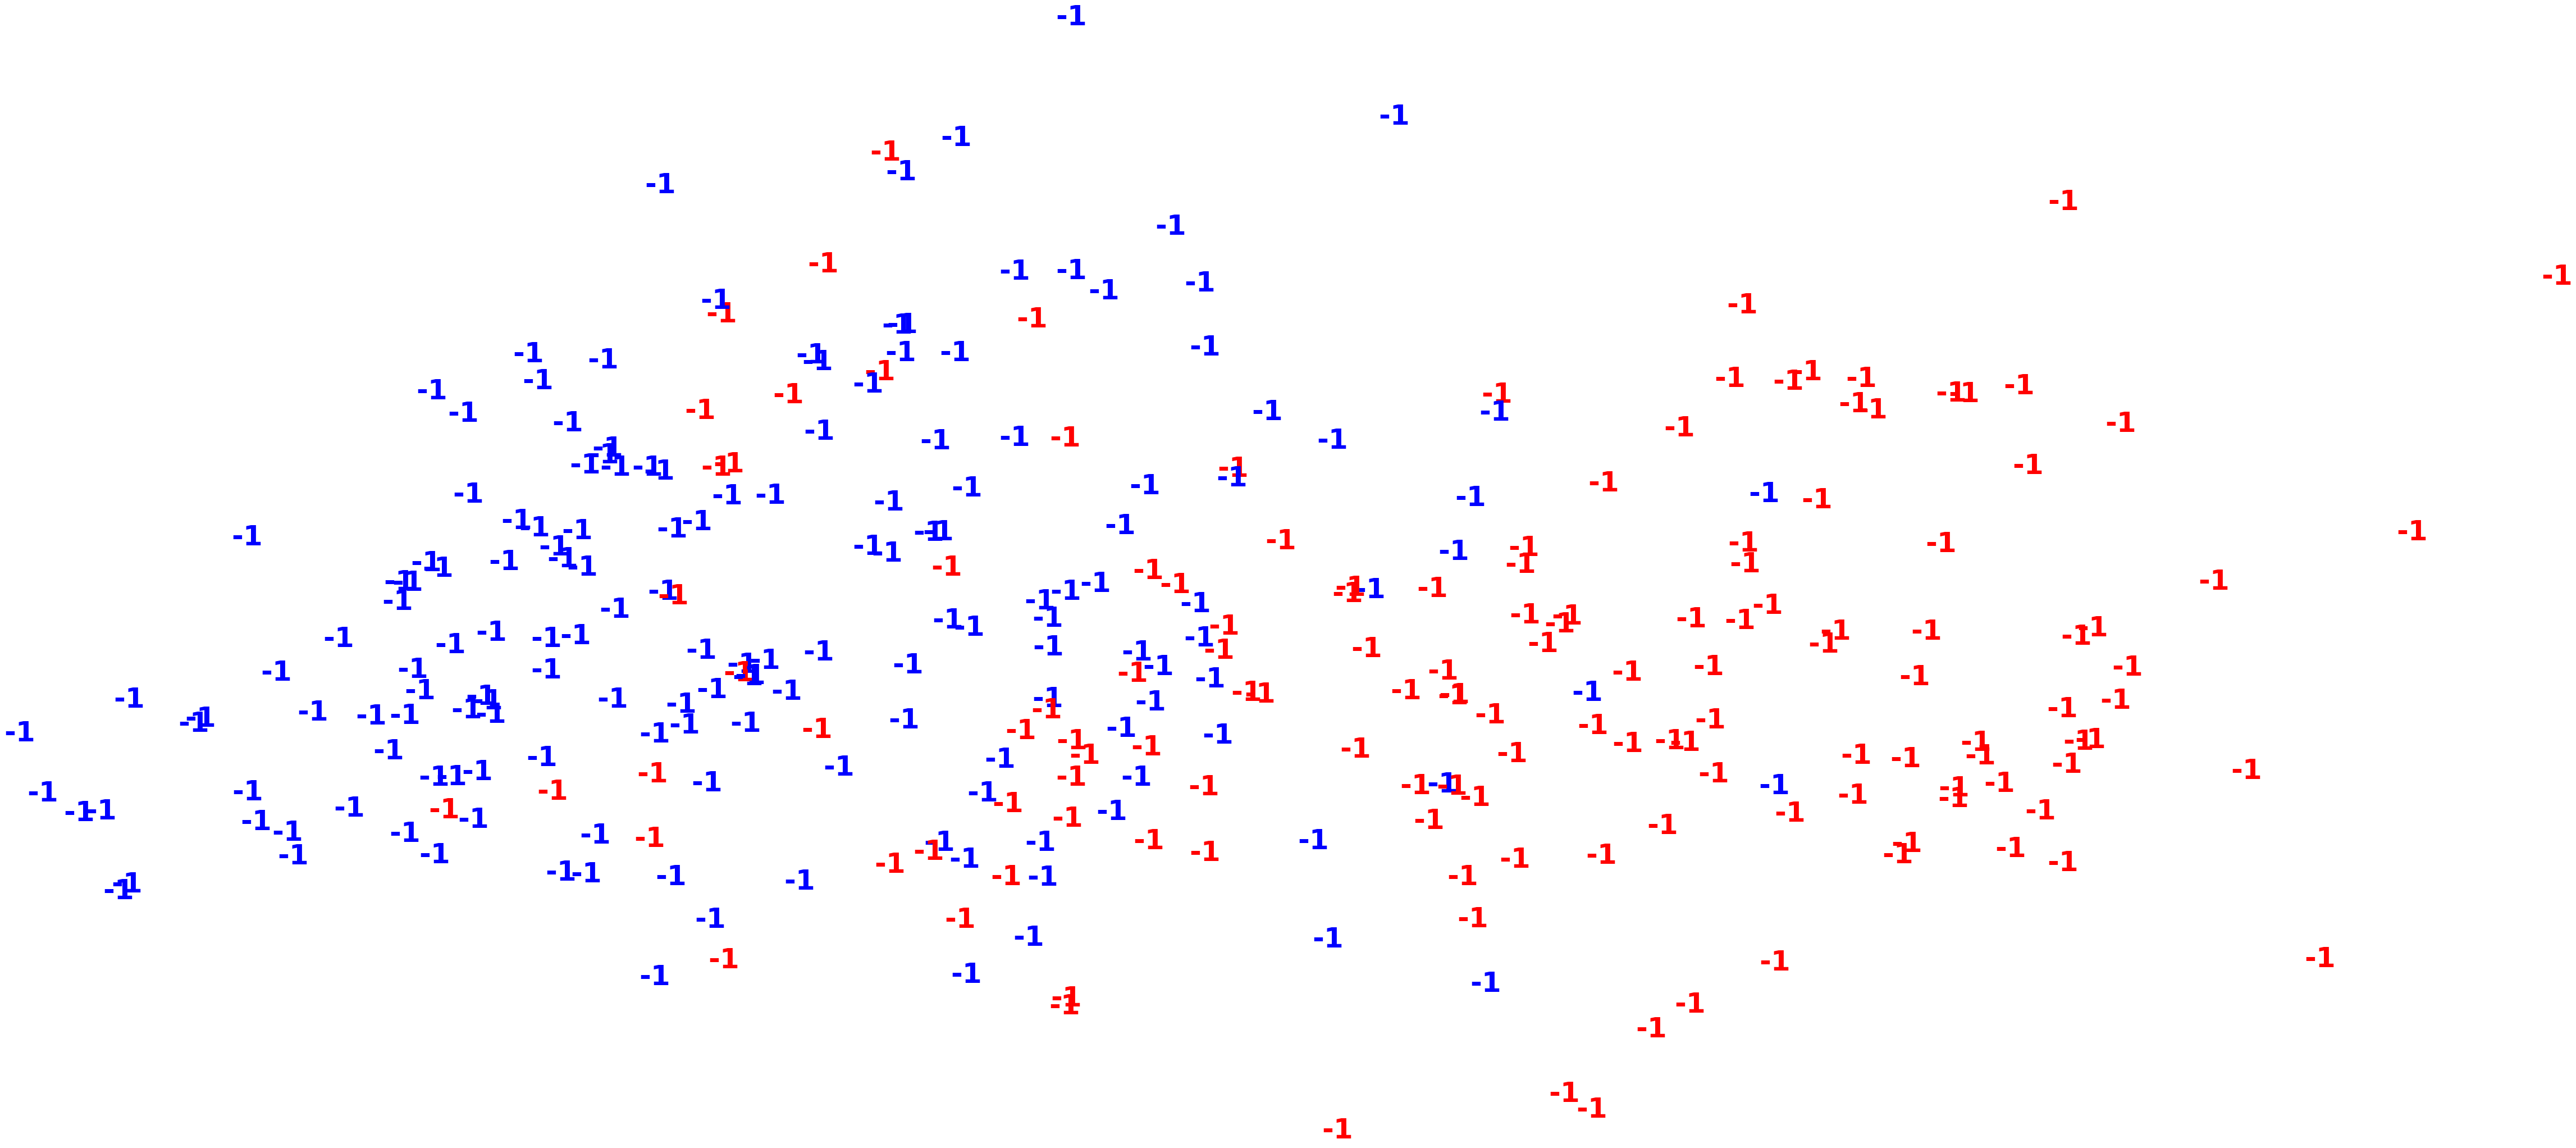

In [15]:
dbse(1, 4)

The number of clusters decreases as min_sample increases.

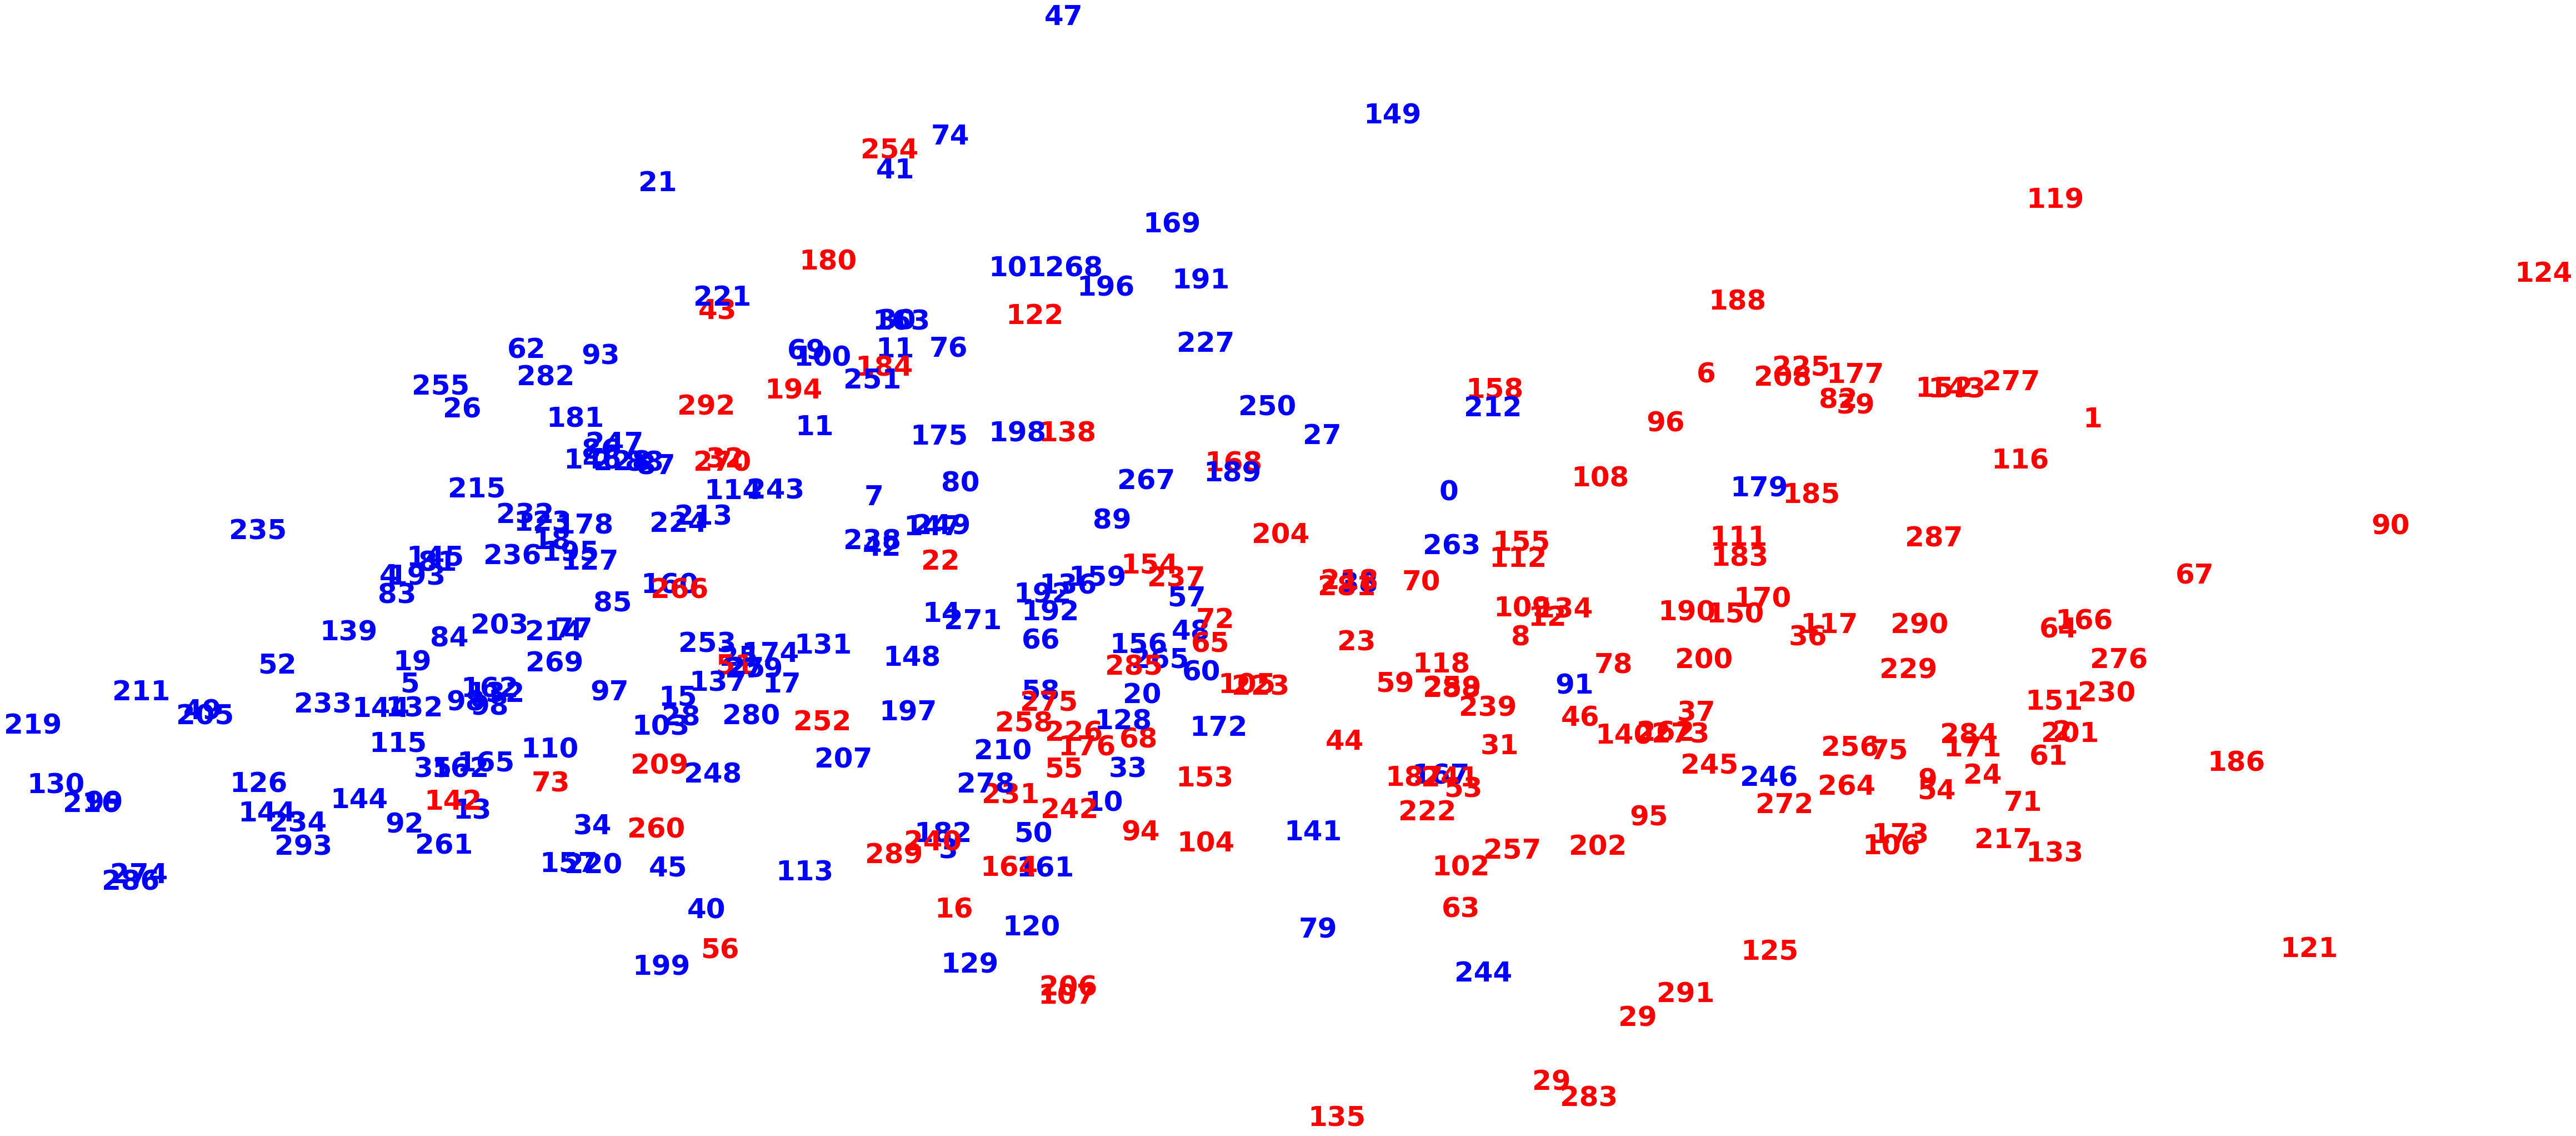

In [16]:
dbse(1, 1)

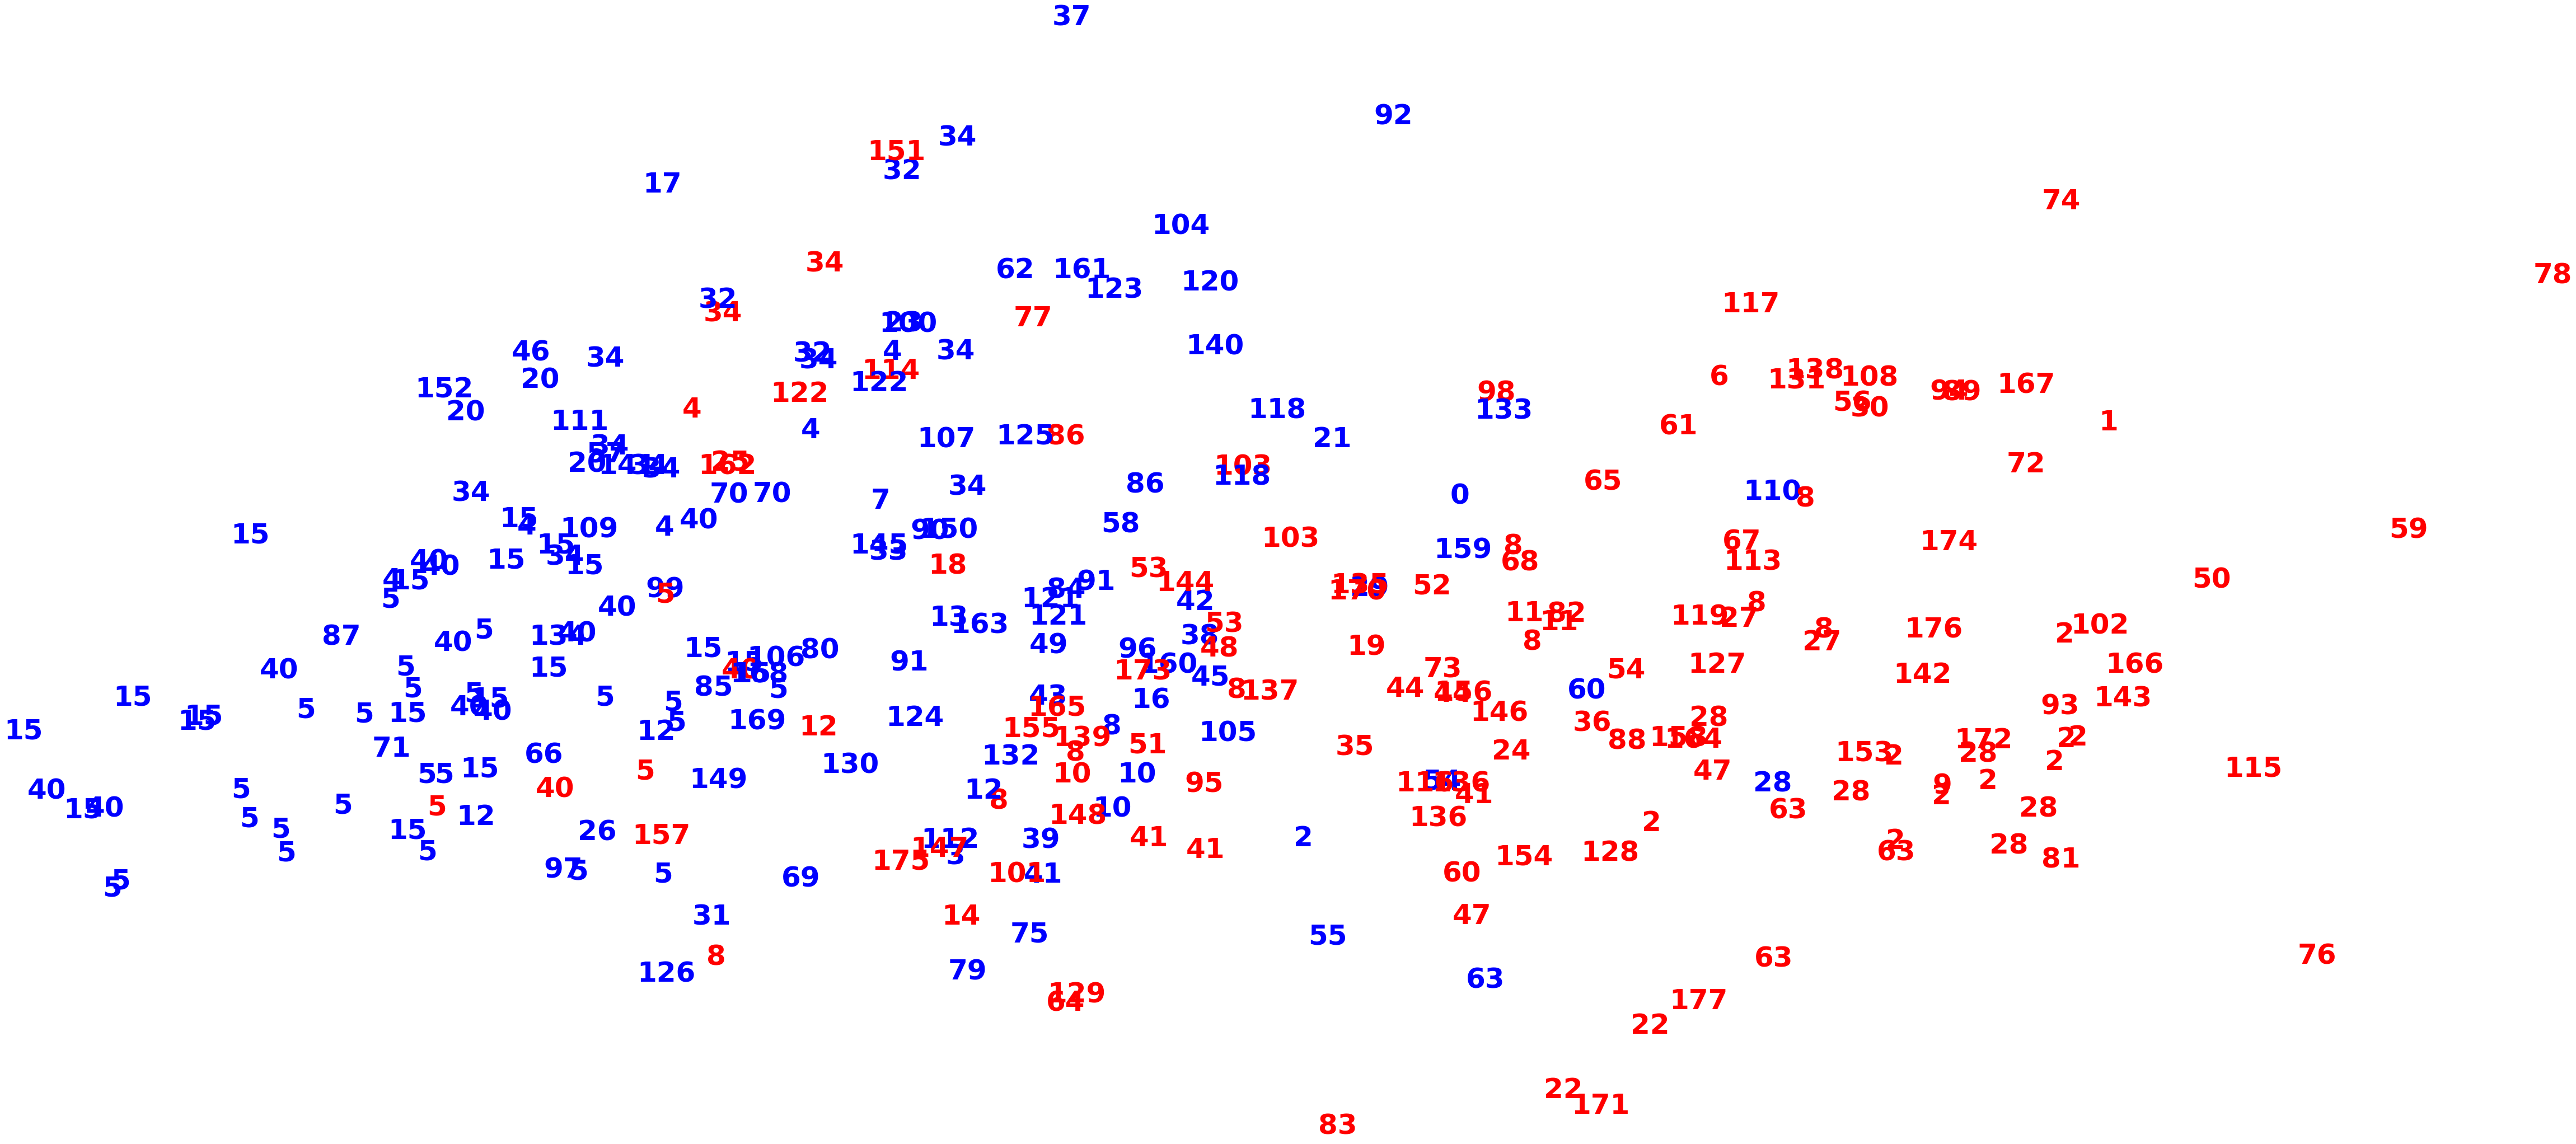

In [17]:
dbse(2, 1)

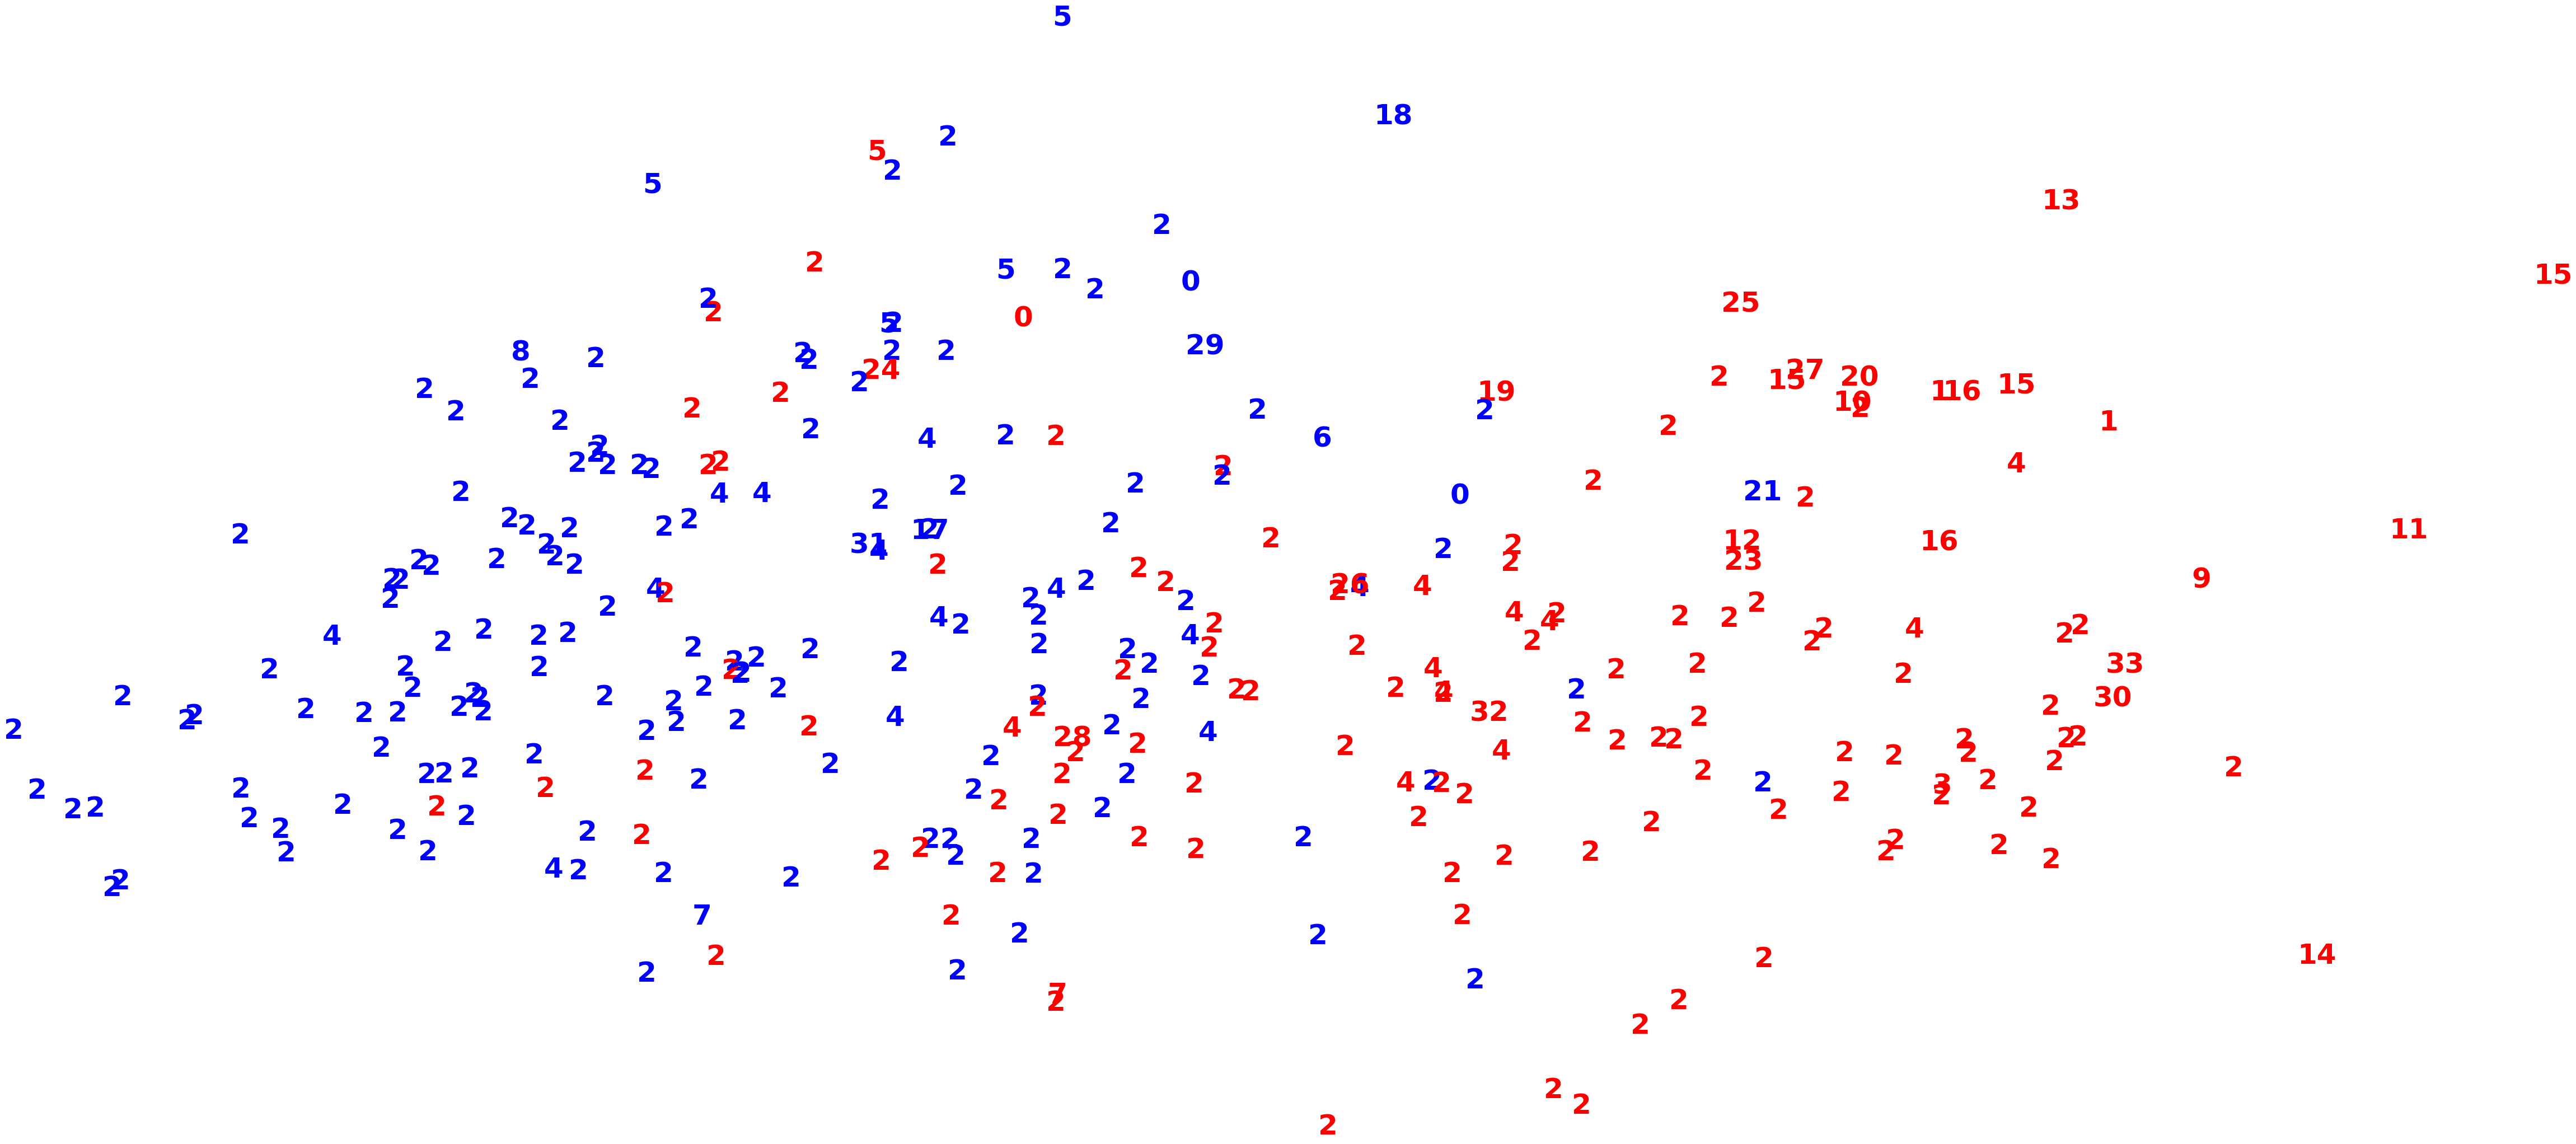

In [18]:
dbse(3, 1)

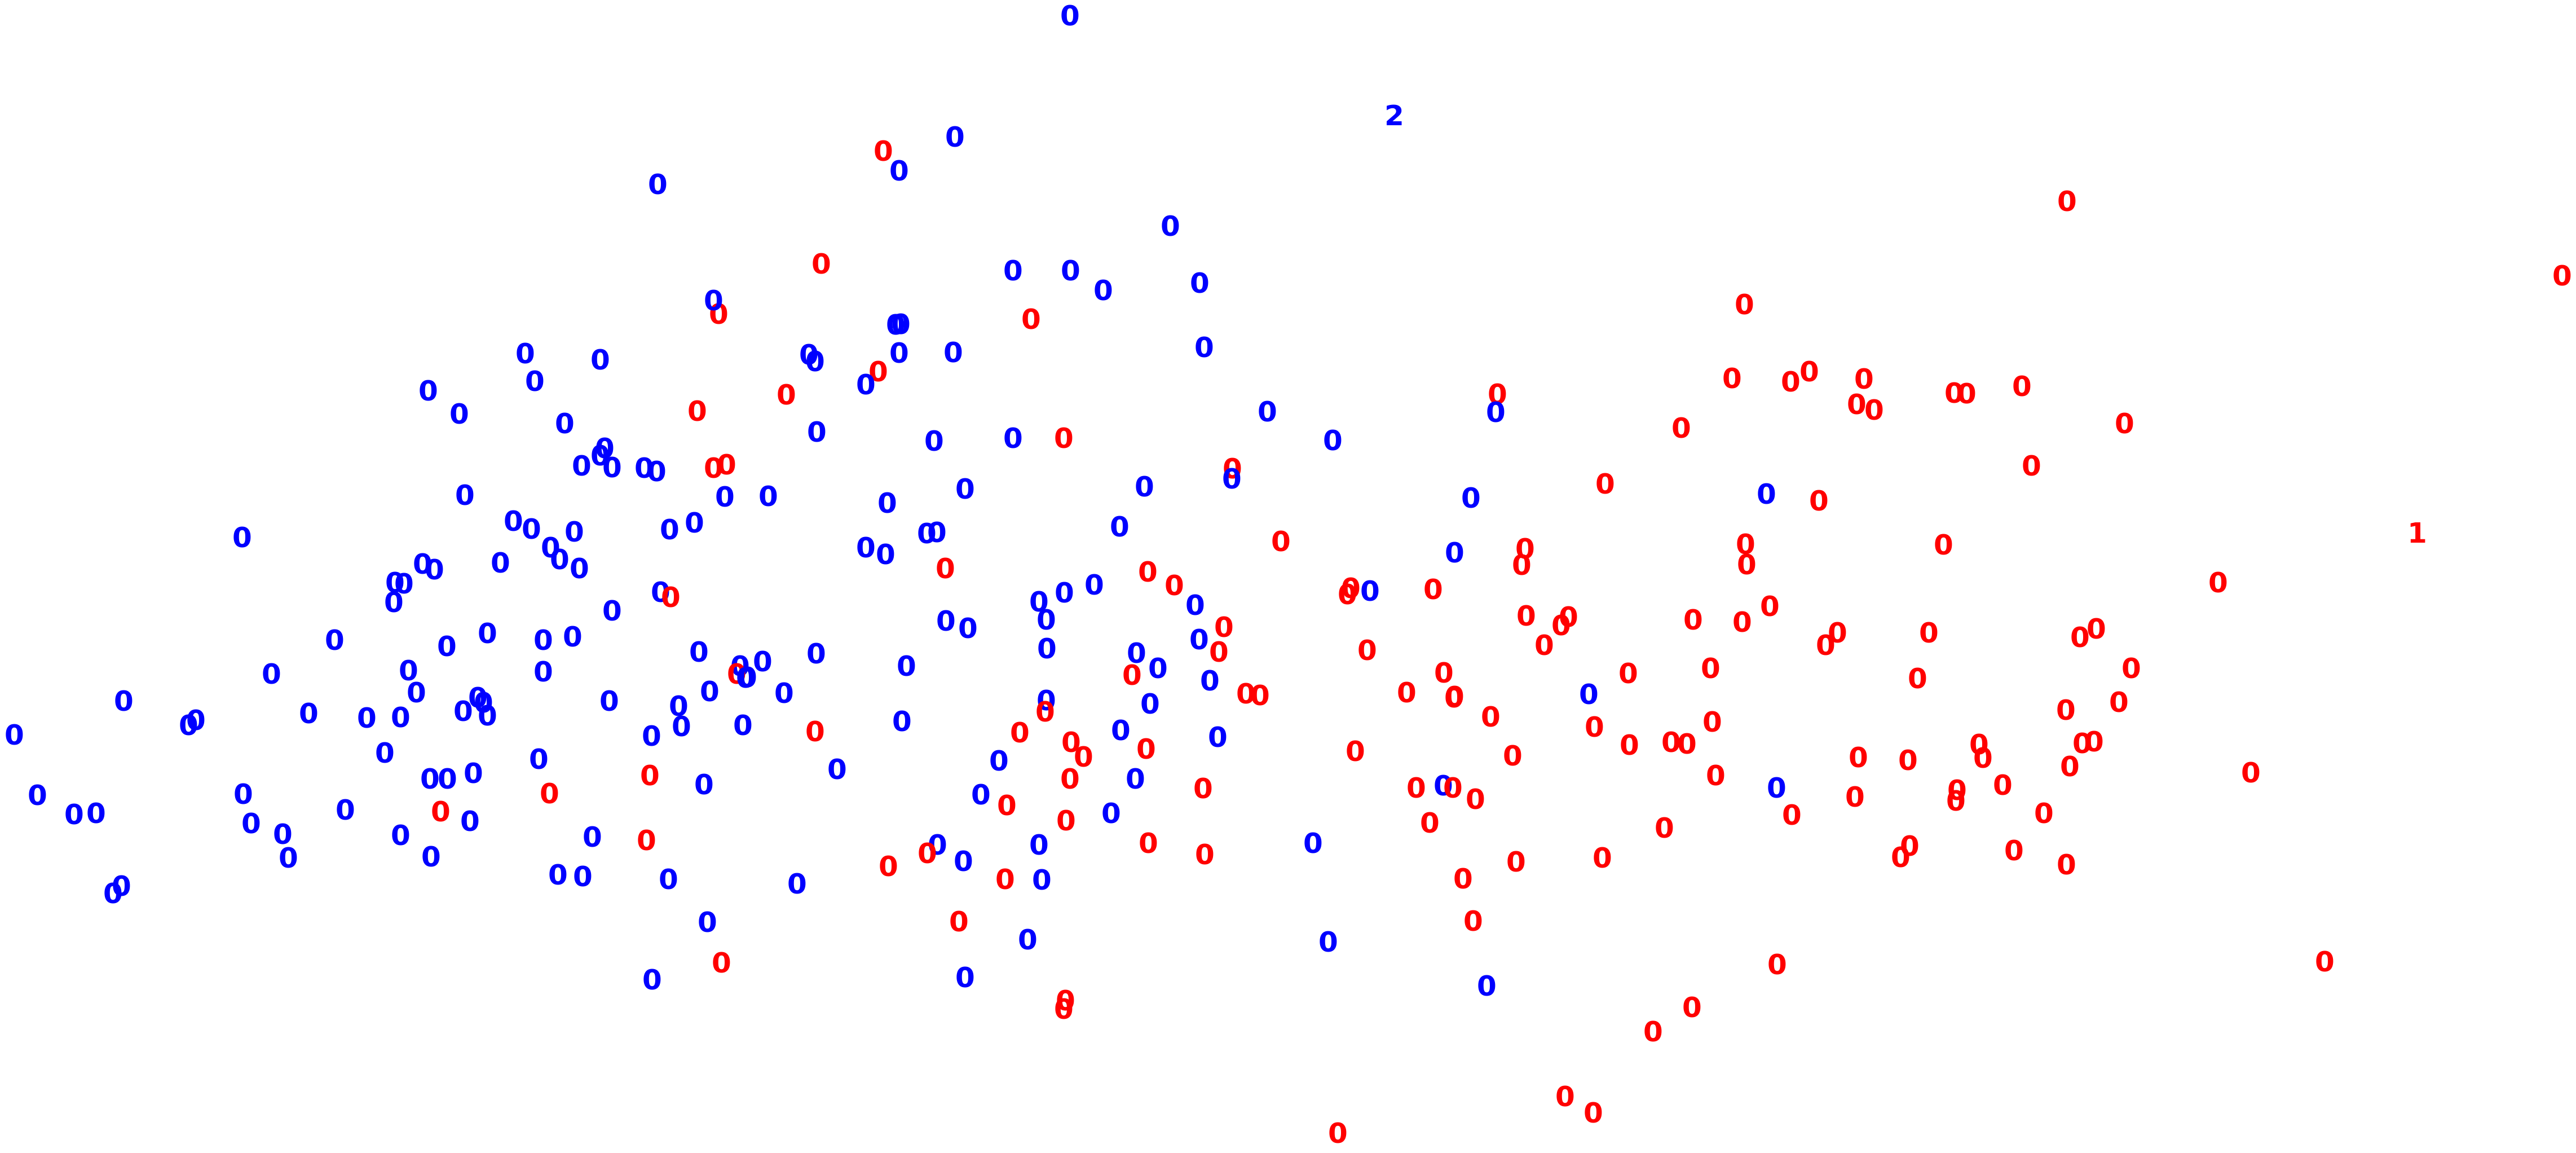

In [19]:
dbse(4, 1)

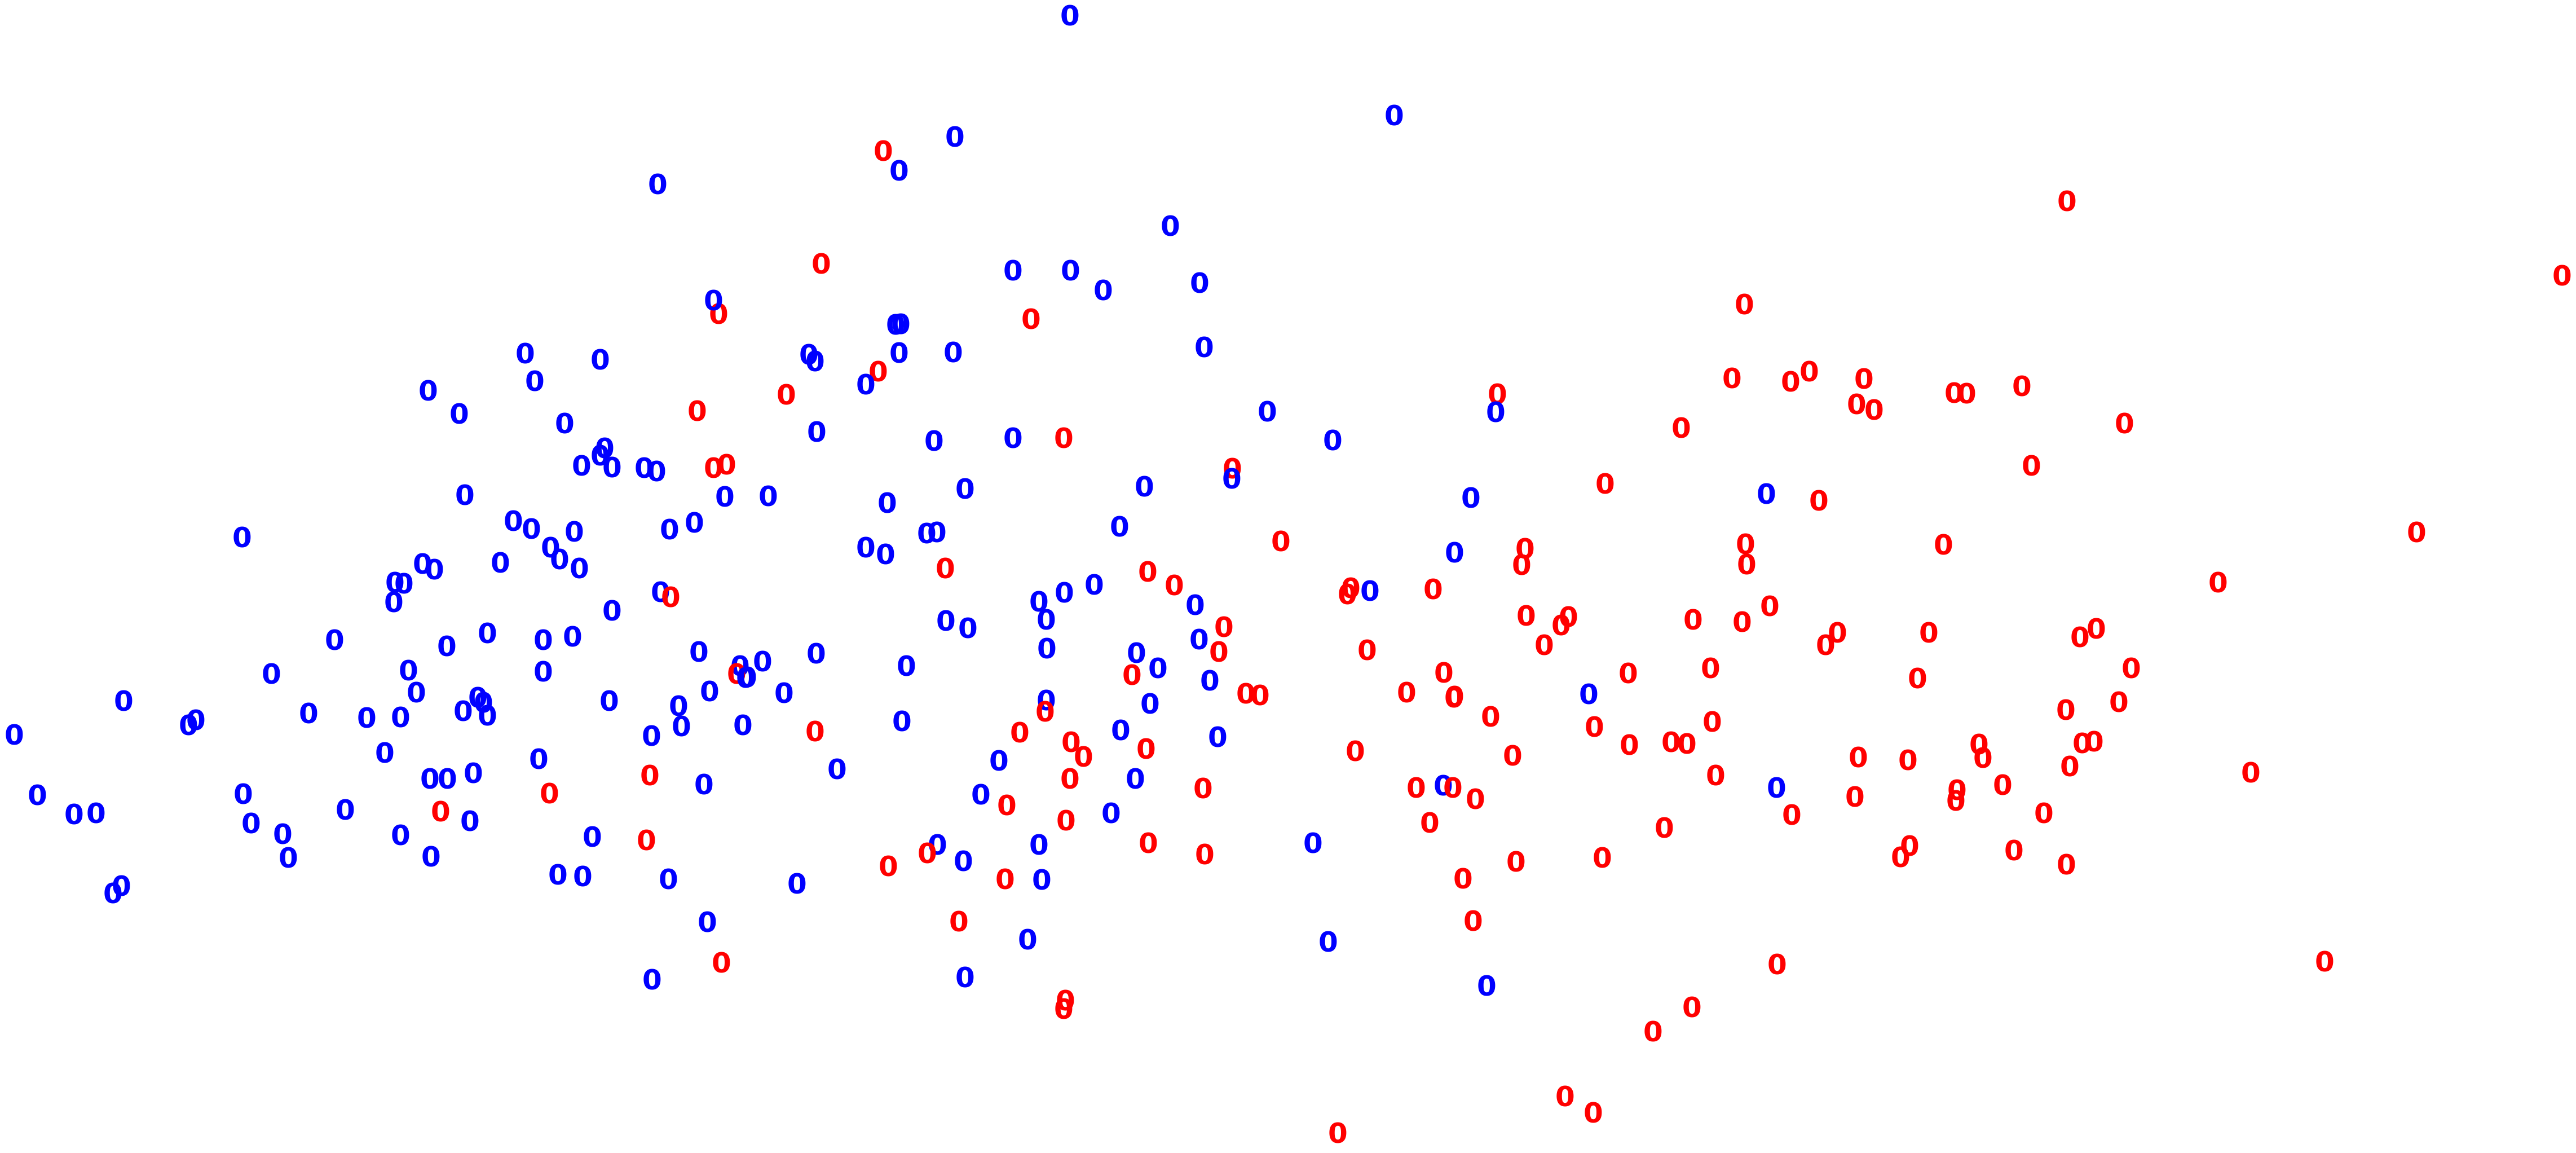

In [20]:
dbse(5, 1)

The number of clusters decreases as epsilon increases, though not as markedly as min_samples did above.